In [4]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.9 MB/s eta 0:00:00


In [27]:
import tensorflow_text as text
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
df_1 = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)
df_2 = pd.read_json('/content/Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [11]:
df = df_1.append(df_2)

<ipython-input-11-2bf93d1efbcc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2)


In [12]:
df = df.reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)

In [13]:
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
55323,jews to celebrate rosh hashasha or something,1
55324,internal affairs investigator disappointed con...,1
55325,the most beautiful acceptance speech this week...,0
55326,mars probe destroyed by orbiting spielberg-gat...,1


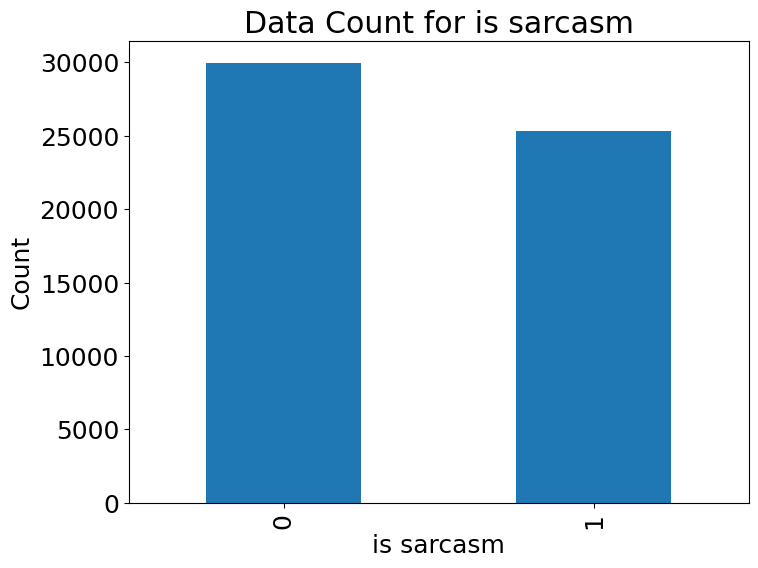

In [14]:
# Get the counts for the last column
counts = df.iloc[:, -1].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.xlabel('is sarcasm')
plt.ylabel('Count')
plt.title('Data Count for is sarcasm')
plt.show()

#Cleaning Data

In [15]:
stop_words = stopwords.words('english')

def text_cleaning(x):

    headline = re.sub('\s+\n+', ' ', x)
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    headline = headline.lower()
    headline = headline.split()

    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)

    return headline


In [16]:
df['clean_headline'] = df['headline'].apply(text_cleaning)

In [17]:
df

,headline,is_sarcastic,clean_headline
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sue secret black co...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood b...
2,mom starting to fear son's web series closest ...,1,mom start fear son web series closest thing gr...
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,j k rowling wish snape happy birthday magical way
...,...,...,...
55323,jews to celebrate rosh hashasha or something,1,jews celebrate rosh hashasha something
55324,internal affairs investigator disappointed con...,1,internal affairs investigator disappoint consp...
55325,the most beautiful acceptance speech this week...,0,beautiful acceptance speech week come queer ko...
55326,mars probe destroyed by orbiting spielberg-gat...,1,mar probe destroy orbit spielberg gate space p...


In [18]:
sarcastic = df[df['is_sarcastic']==1]['clean_headline'].tolist()
genuine = df[df['is_sarcastic']==0]['clean_headline'].tolist()

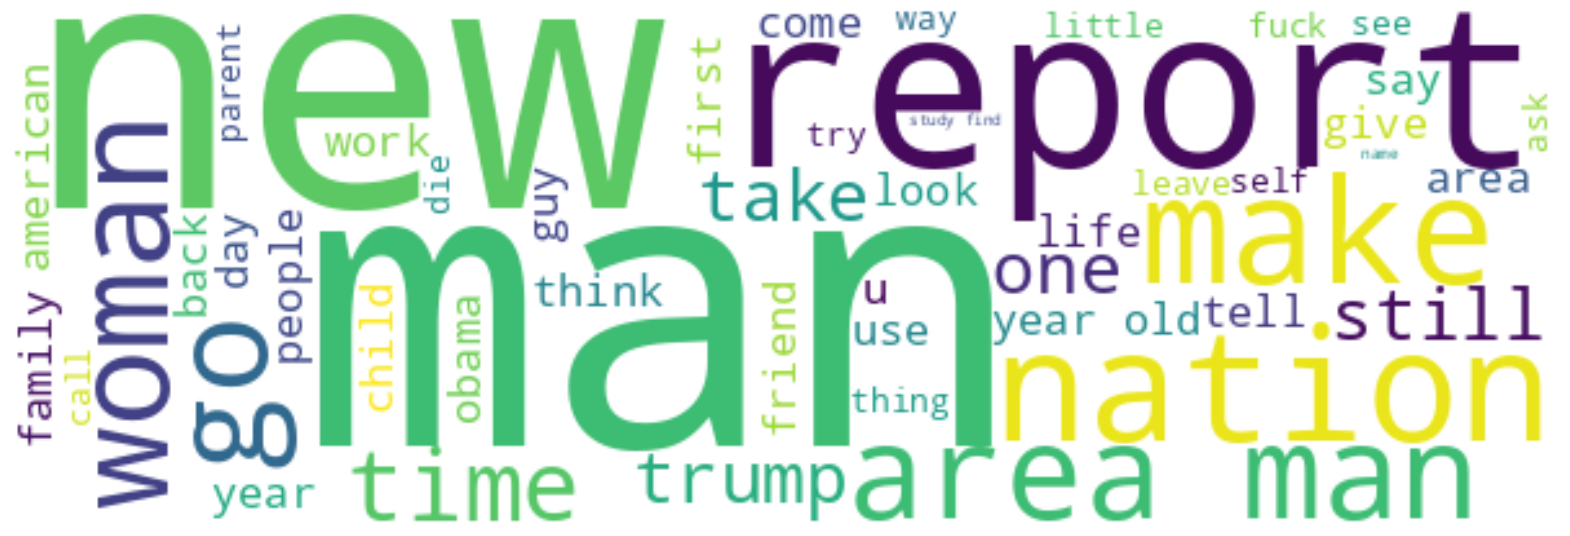

In [19]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(sarcastic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

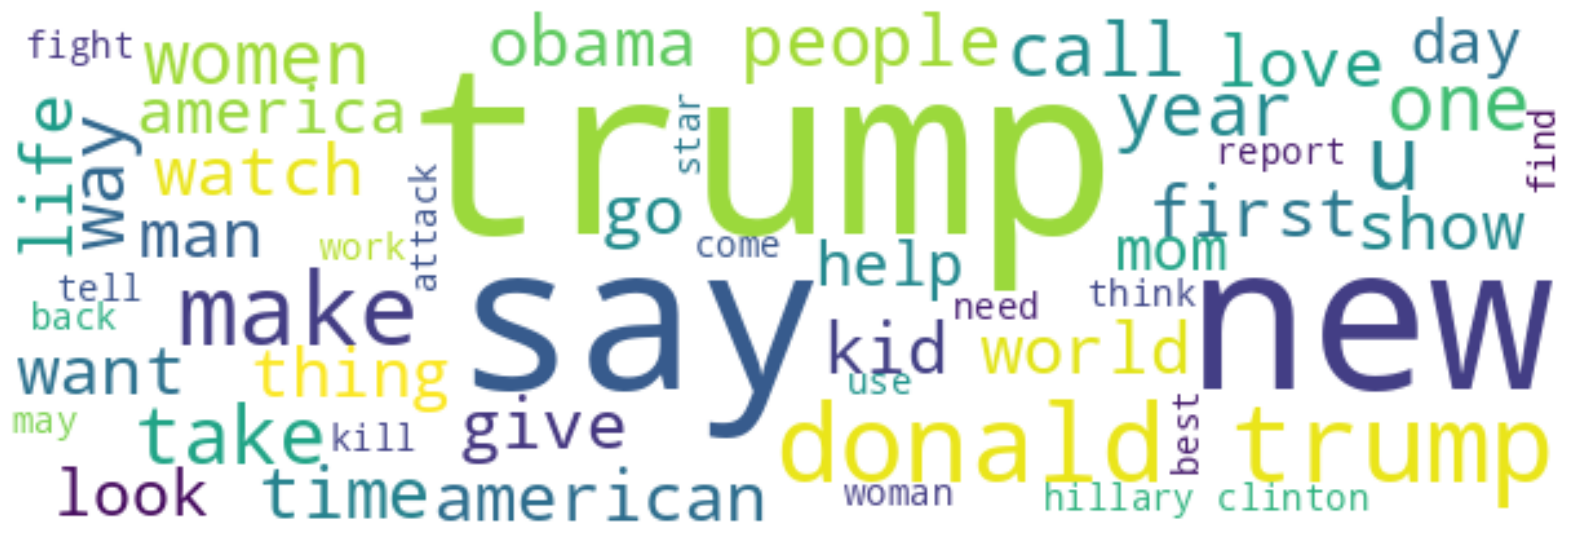

In [20]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Tokenazation

In [ ]:
X = df["clean_headline"]
Y = df["is_sarcastic"]
print(Y[:2])
print(X[1])

In [28]:
tokenize = Tokenizer(oov_token="<oov>")
tokenize.fit_on_texts(X)
word_idx = tokenize.word_index

data_seqence = tokenize.texts_to_sequences(X)
pad_seq = pad_sequences(data_seqence, padding="pre", truncating="pre")

print("The Padding Sequance Shape is  --> ", pad_seq.shape)

The Padding Sequance Shape is  -->  (55328, 107)


In [29]:
pad_seq

array([[   0,    0,    0, ..., 1989, 2469, 7199],
       [   0,    0,    0, ..., 2601,  216, 1006],
       [   0,    0,    0, ..., 4102,  174, 8998],
       ...,
       [   0,    0,    0, ...,   44,  692, 1721],
       [   0,    0,    0, ..., 1519,  688, 5433],
       [   0,    0,    0, ..., 2692,  229,  101]], dtype=int32)

In [30]:
input_length = max(len(seq) for seq in data_seqence)

vocabulary_size = len(word_idx) + 1

input_length, vocabulary_size

(107, 21367)

#Spilt Train , Test Data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(pad_seq,Y, train_size=0.7)